# Sample Usage

In this notebook we report a few examples of the functionalities included in the repository.
When you first connect to this notebook use `slap@usenix21` as password.

NB. individual experiments are identified by different identifiers:
 * `<ID>` is a user-defined experiment id ,
 * `<OBJ>` is the target object id, (e.g., "stop sign"),
 * `<LUX>` identifies the ambient light level in lux.
 
In this notebook we show examples with the following:

In [1]:
experiment_id = "example"
object_id = "stop_sign"
lux = "300"

## 1. Fit a projection model

This is the projection model optimization (Equation 2 in the paper). 
This script saves result in the `/home/data/<ID>` folder, and needs an `all_triples.csv` file to be placed in `/home/data/<ID>/<LUX>/<OBJ>/`.

The `all_triples.csv` file contains the triples resulting from a profiling step (execution of `profile.py`), i.e., columns 1-3 are the rgb color
values for S, columns 4-6 values for P, columns 7-9 values for O. 

For this example we re-use the `all_triples.csv` saved in the `test_run`.

In [2]:
import pandas as pd
import shutil
import os
from os.path import join
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import IFrame
import json
%matplotlib inline

In [3]:
def show_images(filepaths, resize=None):
    n_images = len(filepaths)
    _, ax = plt.subplots(ncols=n_images, figsize=(n_images*3, n_images), sharex=True)
    for i, fpath in enumerate(filepaths):
        ref = skimage.io.imread(fpath)
        if resize:
            ref = skimage.transform.resize(ref, resize)
        ax[i].imshow(ref)
        ax[i].axis("off")

In [4]:
exp_folder = "/home/data/{}".format(experiment_id)
# let's create a folder which will hold the results of this experiment
os.makedirs(join(exp_folder, "projection_model", lux, object_id), exist_ok=True)
# let's copy the all_triples.csv file to the expected location
os.makedirs(join(exp_folder, "profile", lux, object_id), exist_ok=True)
shutil.copyfile(
    "/home/data/test_run/profile/1234/stop_sign/all_triples.csv",
    join(exp_folder, "profile", lux, object_id, "all_triples.csv"))

# let's have a look at how this file looks like
all_triples = pd.read_csv(join(exp_folder, "profile", lux, object_id, "all_triples.csv"))
all_triples.head(5)

,origin_r,origin_g,origin_b,addition_r,addition_g,addition_b,outcome_r,outcome_g,outcome_b,outcome_std,n_matching_pixels
0,74,48,50,254,254,0,104,105,46,0.0,1
1,74,50,53,254,254,127,95,107,100,0.0,1
2,75,43,45,254,0,127,105,38,92,0.0,1
3,75,47,49,254,127,254,90,70,109,0.0,1
4,75,51,53,254,254,254,95,112,113,0.0,1


In [5]:
# now we can run the optimization, 1000 epochs
!python /home/code/projector/projection_model.py -id $experiment_id -pm $lux -ob $object_id 2> /dev/null

Pre-processing 9617/9618Epoch 0, train: 0.3407, test: 0.3379
Epoch 50, train: 0.0385, test: 0.0395
Epoch 100, train: 0.0336, test: 0.0343
Epoch 150, train: 0.0315, test: 0.0321
Epoch 200, train: 0.0297, test: 0.0304
Epoch 250, train: 0.0281, test: 0.0289
Epoch 300, train: 0.0268, test: 0.0277
Epoch 350, train: 0.0254, test: 0.0265
Epoch 400, train: 0.0253, test: 0.0263
Epoch 450, train: 0.0247, test: 0.0259
Epoch 500, train: 0.0246, test: 0.0258
Epoch 550, train: 0.0247, test: 0.0259
Epoch 600, train: 0.0246, test: 0.0258
Epoch 650, train: 0.0239, test: 0.0251
Epoch 700, train: 0.0237, test: 0.0249
Epoch 750, train: 0.0237, test: 0.0251
Epoch 800, train: 0.0233, test: 0.0245
Epoch 850, train: 0.0232, test: 0.0245
Epoch 900, train: 0.0233, test: 0.0246
Epoch 950, train: 0.0234, test: 0.0247
Epoch 1000, train: 0.0229, test: 0.0242
Per channel RGB loss: 0.0084, 0.0065, 0.0081
Cluster 0
empty -> Red output range: 0.07, 0.91
empty -> Green output range: 0.00, 0.72
empty -> Blue output range

In [6]:
# visualize the outputs of the script
proj_model_folder = join(exp_folder, "projection_model", lux, object_id)
output_3d_plot = join(proj_model_folder, "proj_model_plot.pdf")
# proj_model_plot.pdf visualizes the achievable colors in the projection model
img = IFrame("../data/example/projection_model/300/stop_sign/proj_model_plot.pdf", width=500, height=350)
img

In [7]:
# these are the weights of the hidden layers
# these are used in the next step to generate adversarial examples.
weights = json.load(open(join(proj_model_folder, "projection_model.json"), "r"))
print(json.dumps(weights)[:1000], "...")

{"proj_model/dense_layer1/kernel:0": [[0.12885412573814392, 0.07711872458457947, -0.08382578194141388, 0.10001284629106522, -0.2694503962993622, 0.19608165323734283, -0.29129940271377563, 0.07548398524522781, 0.023491738364100456, 0.18243734538555145, -0.38118696212768555, -0.04481573402881622, 0.05644567310810089, 0.024172617122530937, -0.17312517762184143, 0.06096164882183075, 0.06880990415811539, 0.3303976058959961, 0.2781081795692444, -0.22457149624824524, -0.11089926213026047, -0.24691738188266754, 0.24263623356819153, 0.1880904883146286, 0.21126402914524078, -0.1645372211933136, 0.31487536430358887, 0.03566306084394455, 0.2358292192220688, 0.16142535209655762, -0.06439684331417084, -0.04149264842271805, -0.22685007750988007, 0.1230795681476593, 0.1702703833580017, -0.10826064646244049, 0.17994625866413116, 0.013619793578982353, -0.08071525394916534, -0.2021731734275818, -0.21402093768119812, 0.08343510329723358, -0.009522556327283382, -0.22944989800453186, -0.05676674842834473, -

## 2. Generate Adversarial Examples

This is the optimization of the adversarial projection through
the projection model with data augmentation (Equation 3 in the paper).

This script saves result in the `/home/data/<ID>` folder, and needs:
 * A (good resolution) `.png` image containing the the target object
 with transparent background to be found at `data/<ID>/objects/<OBJ>.png`,
 * A projection model json descriptor with the weights of the projection
 model layers to be found at `data/<ID>/projection_model/<LUX>/<OBJ>/projection_model.json`,
 * A folders containing a set of backgrounds to use during the data aumentation
 to be found at `data/<ID>/backgrounds/`.
 
For this example we re-use the `stop_sign.png` saved in the `test_run/objects`
and the script will use the `projection_model.json` computed above.

In [8]:
import skimage.io
import numpy as np

(-0.5, 141.5, 169.5, -0.5)

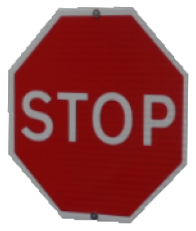

In [9]:
# make an objects folder and copy the stop_sign image
os.makedirs(join(exp_folder, "objects"), exist_ok=True)
shutil.copyfile(
    "/home/data/test_run/objects/stop_sign.png",
    join(exp_folder, "objects", "stop_sign.png"))
plt.imshow(skimage.io.imread(join(exp_folder, "objects", "stop_sign.png")))
plt.axis("off")

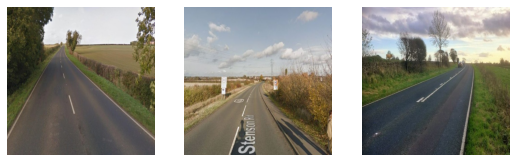

In [10]:
# make a backgrounds folder and copy test_run backgrounds.
shutil.rmtree(join(exp_folder, "backgrounds"), ignore_errors=True)
shutil.copytree(
    "/home/data/test_run/backgrounds",
    join(exp_folder, "backgrounds"))

bg_imgs = ["bg1.jpg", "bg2.jpg", "bg3.jpg"]
show_images([join(exp_folder, "backgrounds", x) for x in bg_imgs])

The generation script requires a target model to run the optimization on
if you have setup the repository according to instructions in the README.md
then you should have the four models used in the paper present in `data/models`:
'yolov3', 'maskrcnn', 'lisacnn_cvpr18', 'gtsrbcnn_cvpr18', the directories
that should be present should be the following:
```
.  # /home/data
├── models                
│   ├── yolov3
│   ├── maskrcnn
│   ├── gtsrbcnn       
│   │   └── cvpr18        
│   └── lisacnn       
│       └── cvpr18      
├── indoor 
└── ...    
```

Let's target yolov3:

In [11]:
target_model = "yolov3"

In [12]:
# the script output reports (epoch, total_variation, detection_score and the norm loss of the projection)
!python /home/code/classifiers/optimize.py -id $experiment_id -n $target_model -pm $lux -ob $object_id --n_epochs=10 2> /dev/null

epoch: 00000/00010, tv: 0.01796, det_score(avg): 19.58505, pnorm(avg): 0.352465568
epoch: 00001/00010, tv: 0.03143, det_score(avg): 17.48835, pnorm(avg): 0.351635143
epoch: 00002/00010, tv: 0.04871, det_score(avg): 17.30362, pnorm(avg): 0.353754762
epoch: 00003/00010, tv: 0.07136, det_score(avg): 16.94154, pnorm(avg): 0.358065999
epoch: 00004/00010, tv: 0.09679, det_score(avg): 13.40980, pnorm(avg): 0.368297394
epoch: 00005/00010, tv: 0.12145, det_score(avg): 9.62339, pnorm(avg): 0.3769538438
epoch: 00006/00010, tv: 0.13807, det_score(avg): 7.09850, pnorm(avg): 0.3869839947
epoch: 00007/00010, tv: 0.14953, det_score(avg): 5.52430, pnorm(avg): 0.393558200
epoch: 00008/00010, tv: 0.15802, det_score(avg): 4.63543, pnorm(avg): 0.3977039505
epoch: 00009/00010, tv: 0.16492, det_score(avg): 3.17197, pnorm(avg): 0.402670399
Everthing is saved


(-0.5, 2999.5, 899.5, -0.5)

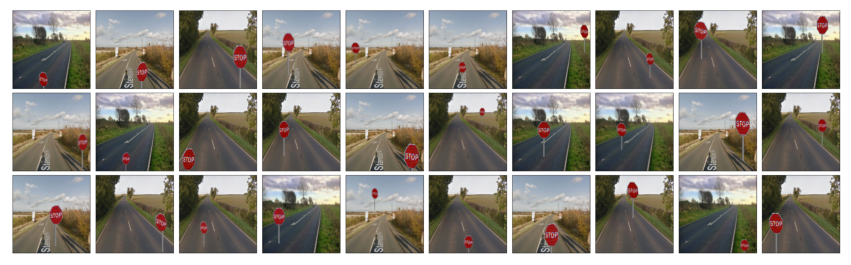

In [13]:
# show an example of the generated training data
output_folder = join(exp_folder, "optimize", lux, object_id, target_model)
_, ax = plt.subplots(figsize=(15, 5))
ax.imshow(skimage.io.imread(join(output_folder, "traindata", "00009.png")))
ax.axis("off")

We can now show the optimized projection through the epochs.
The last epoch's projection can be found in the last element of `projections.npy`
or in `_best_projection.png`.

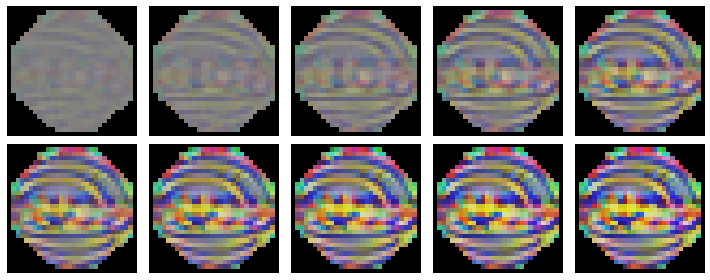

In [14]:
_, ax = plt.subplots(ncols=5, nrows=2, figsize=(10, 4), sharex=True, sharey=True)
projections = np.load(join(output_folder, "projections.npy"))
last_n = 10
for i, projection in enumerate(projections[-last_n:]):
    rowi = i//5
    coli = i%5
    ax[rowi, coli].imshow(projection)
    ax[rowi, coli].axis("off")
plt.tight_layout()

### 2.1 Implementing Adversarial Examples for custom model

If you want to re-use the AE generation with your own model, you have to subclass
`classifiers.Optimizer.Optimizer`, with your own class `CustomClass`. The 
`CustomClass` has to re-implement the following methods:
 * `__init__(...)` needs to load the model's graph and weights to a session
 saved in `CustomClass.sess`, needs to save a reference to the network
 input tensor in `CustomClass.input` (i.e., the input image) and needs to
 save a reference to the output detection probabilities in `CustomClass.scores`.
 The scores can be either the softmax layer when doing multi-class prediction, 
 or a reference to a (batch, num_boxes, n_classes) tensor when doing object
 detection.
 * `slapped_input_to_network_input(box_coords_tensor, slapped_input_tensor,)`
 is used to take the output of the  data augmentation pipeline and feed it to
 the network. For object detectors this simply forward its argument to the network,
 meanwhile for multi-class prediction (with lisacnn and gtsrbcnn) this needs to
 crop the roi defined by `box_coords_tensor` (which contains the target object)
 from `slapped_input_tensor` and feed the roi only. See examples in 
 `classifiers/lisacnn/optimizer.LisaOptimizer`.

Once you have implemented that, you can try to run the optimization. It might
not work out of the box, there are a lot of parameters involved defined in 
`classifiers/params.yaml`, you might have to tune those.

## 3. Detect Objects

Using models to detect objects is as easy as it gets.
The `data.zip` folder comes with all the models used in the paper: 
```
["yolov3", "maskrcnn", "gtsrbcnn_cvpr18", "gtsrbcnn_cvpr18iyswim", "gtsrbcnn_usenix21",
"gtsrbcnn_usenix21adv", "lisacnn_cvpr18", "lisacnn_cvpr18iyswim", "lisacnn_usenix21",
"lisacnn_usenix21adv"]
```

### 3.1 Object Detectors
For `yolov3` and `maskrcnn` you can simply call the following

In [15]:
output_folder = join(exp_folder, "detection")
os.makedirs(output_folder, exist_ok=True)
!python /home/code/classifiers/detect.py -n0 yolov3 -f /home/data/test_run/yolov3_legit.jpeg -o $output_folder 2> /dev/null
!python /home/code/classifiers/detect.py -n0 yolov3 -f /home/data/test_run/yolov3_ae.jpeg -o $output_folder 2> /dev/null

Box at [710.55444 313.7374  980.11505 586.60675] for stop sign (11), score 0.98531854


(-0.5, 1708.5, 959.5, -0.5)

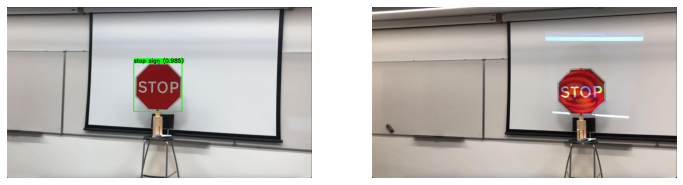

In [16]:
# check the output
_, ax = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(skimage.io.imread(join(output_folder, "yolov3_legit.jpeg")))
ax[0].axis("off")
ax[1].imshow(skimage.io.imread(join(output_folder, "yolov3_ae.jpeg")))
ax[1].axis("off")

### 3.2 Traffic Sign Classifiers
For LisaCNN and GtsrbCNN there are various models to choose from, specified by 
the `-n1` argument: 
 * `cvpr18` is the model take from the cvpr18 paper [1],
 * `cvpr18iyswim` is `cvpr18` with the randomization layer of [2],
 * `usenix21` is the same architecture as `cvpr18` but we re-trained it
 from scratch with our train/test/val split and data augmentation.
 * `usenix21adv` is `usenix21` but trained with adversarial learning. 
 
For all of these, you can not feed the entire image to the model since they
only take a cutout of the target object, therefore you will have to define a
roi. This can be done either by providing the `--roi` argument, or if you 
have a display available an opencv window will pop up asking you to draw the
roi on the input frame.
 
[1] - Eykholt, Kevin, et al. **"Robust physical-world attacks on deep learning visual classification."** Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2018.  
[2] - Xie, Cihang, et al. **"Mitigating adversarial effects through randomization."** arXiv preprint arXiv:1711.01991 (2017).
 

In [17]:
!python /home/code/classifiers/detect.py -n0 lisacnn -n1 usenix21 -f /home/data/test_run/yolov3_legit.jpeg -o $output_folder --roi 710 310 285 285 2> /dev/null
!python /home/code/classifiers/detect.py -n0 lisacnn -n1 usenix21 -f /home/data/test_run/yolov3_ae.jpeg -o $output_folder --roi 1020 330 285 285 2> /dev/null

Box at [710, 310, 995, 595] for stop (14), score 1.0
Box at [1020, 330, 1305, 615] for stop (14), score 1.0


(-0.5, 1708.5, 959.5, -0.5)

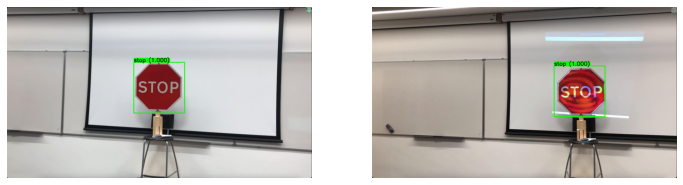

In [18]:
# check the output
_, ax = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(skimage.io.imread(join(output_folder, "yolov3_legit.jpeg")))
ax[0].axis("off")
ax[1].imshow(skimage.io.imread(join(output_folder, "yolov3_ae.jpeg")))
ax[1].axis("off")

## 4. Defences

We have three different defences in the paper:

 * *input_randomization* is achieved by simply adding new resizing and
 reshaping layers before the image is fed into the network. We provide
 the two models obtained this way with `gtsrbcnn_cvpr18iyswim` and 
 `lisacnn_cvpr18iyswim`,
 * *adversarial learning* described below,
 * *sentinet* described below.
 

### 4.1 Adversarial Learning

We use the [neural structured learning library](https://www.tensorflow.org/neural_structured_learning)
to re-train our models from
scratch with and without adversarial loss. 
We provide the datasets used for training in `data/datasets`, one can train
a custom model by defining a class with a `build` method which returns
a `tf.keras.models.Model` (see example in `classifiers/lisacnn/model.py`).

The file `/home/code/defences/adv_train.py` contains the utilities
to train models. It expects a model with `-m` (this has to be linked
with the `model.py` implementation mentioned above and will use
adversarial loss if fed the `-a` parameter, like so:

In [ ]:
!python /home/code/defences/adv_train.py -m gtsrbcnn -a --training_epochs 2 -o /home/data/example/defences/ 2> /dev/null

Found 35289 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.
Found 3920 images belonging to 43 classes.
Model: "gtsrbcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 3)    12          image[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 3)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   2432  

### 4.2 Sentinet

[Sentinet](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9283822)
works differently compared to the other two defences, 
it requires a set of reference samples that do not contain any AE.

Afterwards, in brief, it compares properties (salient areas) of newly
seen samples with the properties of the reference samples, when
these differ significantly then it can signal the presence of an
attack (this requires many additional inferences).

We implemented Sentinet in `code/defences/sentinet.Sentinet`.
Here is an example of how you can use it:

In [ ]:
# get reference images, benign images and adversarial images
# let's copy these from the test_run
shutil.rmtree("/home/data/{}/sentinet".format(experiment_id), ignore_errors=True)
shutil.copytree("/home/data/test_run/sentinet", "/home/data/{}/sentinet".format(experiment_id))

In [ ]:
# Reference images
ref_images = ["00000.png", "00001.png", "00002.png"]
show_images([join(exp_folder, "sentinet", "reference", x) for x in ref_images], resize=(64, 64))

In [ ]:
# Benign images
ref_images = ["00000.png", "00001.png", "00002.png"]
show_images([join(exp_folder, "sentinet", "benign", x) for x in ref_images], resize=(64, 64))

In [ ]:
# Adversarial images
ref_images = ["v11_00195.png", "v6_00538.png", "v8_00181.png"]
show_images([join(exp_folder, "sentinet", "adversarial", x) for x in ref_images], resize=(64, 64))

In [ ]:
# now that these are set we can run sentinet
!python /home/code/defences/sentinet.py -t /home/data/$experiment_id/sentinet/reference/ -b /home/data/$experiment_id/sentinet/benign/ -a /home/data/$experiment_id/sentinet/adversarial/ -o /home/data/$experiment_id/sentinet/ -m lisacnn_cvpr18 2> /dev/null

In [ ]:
# load the results files and plot data
df_adv = pd.read_csv(join(exp_folder, "sentinet", "adversarial_results.csv"), index_col=0)
df_ben = pd.read_csv(join(exp_folder, "sentinet", "benign_results.csv"), index_col=0)

df_adv.head(3)

In [ ]:
x_adv, y_adv = df_adv.FoolPercentage.values, df_adv.Confidence.values
x_ben, y_ben = df_ben.FoolPercentage.values, df_ben.Confidence.values
_, ax = plt.subplots(figsize=(6, 3))

ax.scatter(x_adv, y_adv, c="red", marker="^", label="AE")
ax.scatter(x_ben, y_ben, c="blue", marker="^",  label="Legit")
ax.set_xlabel("FoolPercentage")
ax.set_ylabel("Confidence")
ax.legend()